<a href="https://colab.research.google.com/github/LuhZech/machine_learning_repository/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os   #this module is used to work with time.py(time, data, day, year, etc)
import PIL  #Pillow is a Python Imaging Library (PIL), which adds support for opening, manipulating, and saving images. 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential




In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


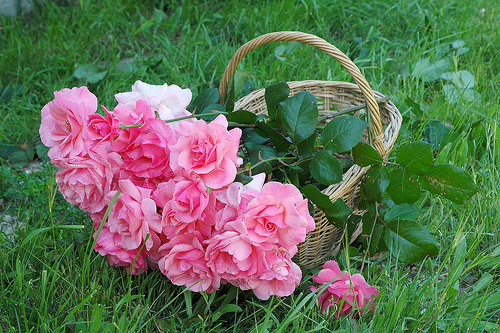

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

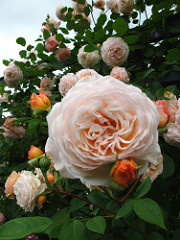

In [ ]:
PIL.Image.open(str(roses[1]))

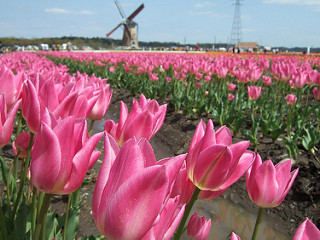

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
#Using Keras utils 

batch_size = 32
img_height = 180
img_width = 180

#A good way to practice is using a validation division: 80% of the images for train and 20¢ for validation

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       seed = 123,
                                                       image_size = (img_height, img_width),
                                                       batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#Using class_names to direct the names in alfabetic order

class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


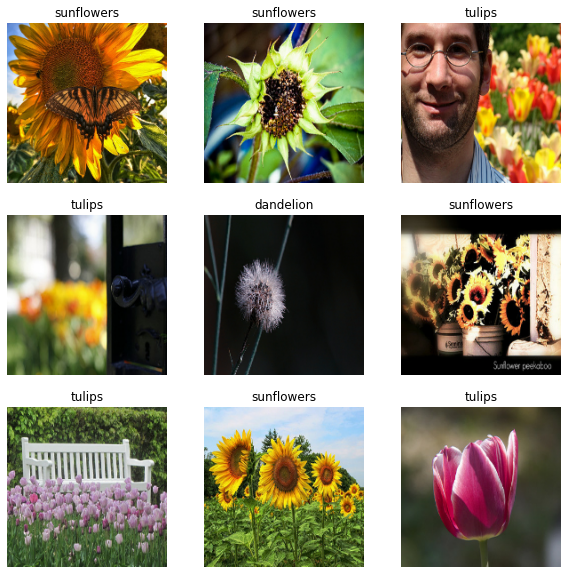

In [ ]:
#Viewing the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break




#Configuring the datas for performance

AUTOTUNE = tf.data.AUTOTUNE 

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

#the values of the channels RGB are [0, 255] gamma. This is not the ideal for a neural network. Is necessary 
#decrease this values. 

normalization_layer = layers.Rescaling(1./255) # Rescaling resizes an image by a given scaling factor
normalization_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
first_image = image_batch[0]

#notice the pixel values are now in [0, 1]

print(np.min(first_image), np.max(first_image))

(32, 180, 180, 3)
(32,)
0.7500229 255.0


In [ ]:
#Creating the model

num_classes = len(class_names)

model = Sequential([
                    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [ ]:
#Compile the model

model.compile(optimizer = 'adam',  #adam is the best optimizer to use with keras
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#Training the model

epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
92/92 [==============================] - 92s 994ms/step - loss: 1.3020 - accuracy: 0.4513 - val_loss: 1.0201 - val_accuracy: 0.6144
Epoch 2/10
92/92 [==============================] - 89s 969ms/step - loss: 0.9389 - accuracy: 0.6376 - val_loss: 0.9976 - val_accuracy: 0.5872
Epoch 3/10
92/92 [==============================] - 89s 970ms/step - loss: 0.7440 - accuracy: 0.7187 - val_loss: 0.8934 - val_accuracy: 0.6403
Epoch 4/10
92/92 [==============================] - 89s 971ms/step - loss: 0.5538 - accuracy: 0.7943 - val_loss: 0.9659 - val_accuracy: 0.6417
Epoch 5/10
92/92 [==============================] - 91s 984ms/step - loss: 0.3315 - accuracy: 0.8845 - val_loss: 1.0756 - val_accuracy: 0.6322
Epoch 6/10
92/92 [==============================] - 90s 974ms/step - loss: 0.2052 - accuracy: 0.9322 - val_loss: 1.2762 - val_accuracy: 0.6635
Epoch 7/10
92/92 [==============================] - 90s 977ms/step - loss: 0.0916 - accuracy: 0.9728 - val_loss: 1.2732 - val_accuracy: 0.6403

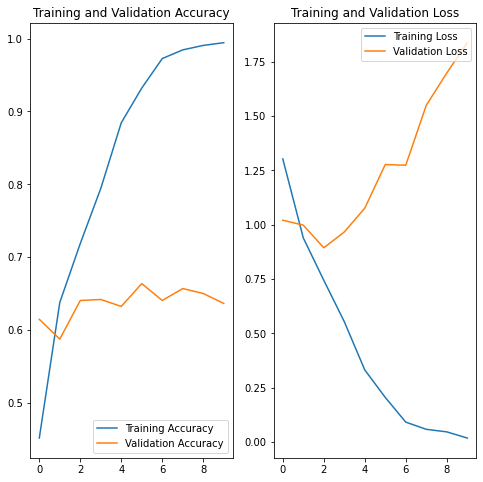

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label= 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title( 'Training and Validation Loss')
plt.show()

The graphics show the train precision and the validation precision are wrong, and the model reach only 60% of the precision of validation. This is called Overfitting: when the number of examples to train the model is small, the model will learn with wrong details.

In [ ]:
#Increasing data

data_augmentation = keras.Sequential(
    [
     layers.RandomFlip('horizontal',
                       input_shape = (img_height,
                                      img_width,
                                      3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1),
    ]
)

Let's visualize the appearance of some increased examples applying the increase datas to the same data many times:      

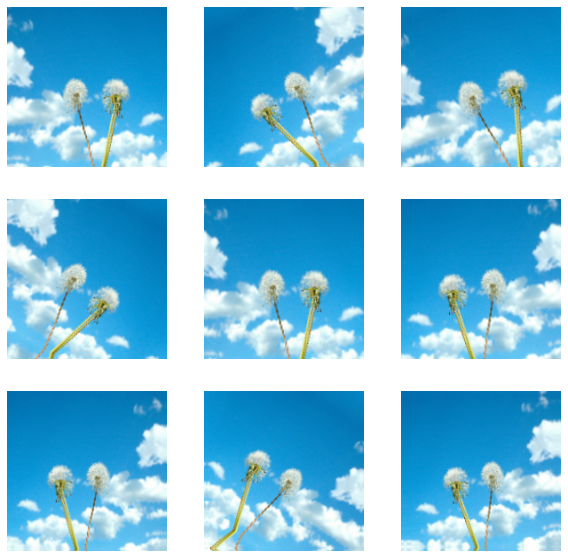

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

DROPOUT: another way to reduce overfitting is introduce the abandon. when you apply the abandon in a layer, it's delete randomly a number of exit units during the process. The dropout brings a fractional number with the entrance value. Examples> 0.1, 0.2, 0.4, etc. That means withdraw 10%, 20% or even 40% of the exit units randomly.

Let's create a new neural network with tf.keras.layers.Dropout before training using the increased images. 

In [ ]:
model = Sequential([
                    data_augmentation,
                    layers.Rescaling(1./255),
                    layers.Conv2D(16, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3, padding='same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [ ]:
#Compile and training model

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/15
92/92 [==============================] - 105s 1s/step - loss: 1.2006 - accuracy: 0.4905 - val_loss: 1.0769 - val_accuracy: 0.5599
Epoch 2/15
92/92 [==============================] - 103s 1s/step - loss: 1.0115 - accuracy: 0.6107 - val_loss: 0.9812 - val_accuracy: 0.5926
Epoch 3/15
92/92 [==============================] - 104s 1s/step - loss: 0.9132 - accuracy: 0.6454 - val_loss: 0.8519 - val_accuracy: 0.6676
Epoch 4/15
92/92 [==============================] - 104s 1s/step - loss: 0.8403 - accuracy: 0.6809 - val_loss: 0.7823 - val_accuracy: 0.6962
Epoch 5/15
92/92 [==============================] - 104s 1s/step - loss: 0.7802 - accuracy: 0.6955 - val_loss: 0.7479 - val_accuracy: 0.7139
Epoch 6/15
92/92 [==============================] - 104s 1s/step - loss: 0.7334 - accuracy: 0.7193 - val_loss: 0.8030 - val_accuracy: 0.6880
Epoch 7/15
92/92 [==============================] - 104s 1s/step - loss: 0.6974 - accuracy: 0.7418 - val_loss: 0.7621 - val_accuracy: 0.7057
Epoch 8/15
92

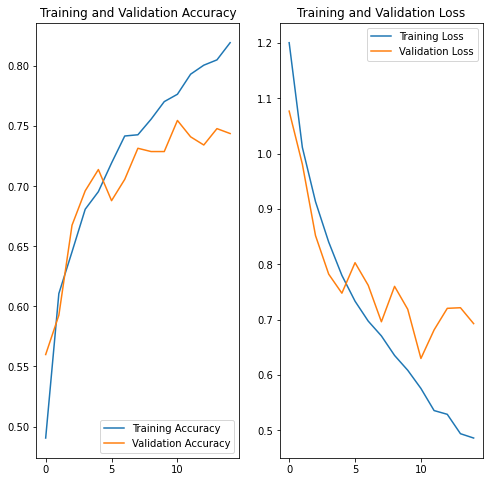

In [ ]:
#Visualise the results of the training

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Predicting new datas


sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin = sunflower_url)
img = tf.keras.utils.load_img(
    sunflower_path, target_size = (img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  #create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    'This image most likely belongs to {} with a {:.2f} percent confidence.'
    .format(class_names[np.argmax(score)], 100 * np.max(score))
  
)

This image most likely belongs to sunflowers with a 71.26 percent confidence.
